In [1]:
# Cluster locator
# This program reads extremophile protein alignment FASTA files, obtains the average frequency of
# specified amino acids at particular regions, compares the averages to other organisms, and shows if 
# the differences in protein composition are significant
# Avery Hill
# 11/30/2020

In [1]:
# clear environment
%reset -f

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# FASTA files containing protein sequence data of different types of 
# organisms (e.g psychrophiles, thermophiles, and mesophiles)
infile = ["GEBA-AJS_gyra_align3_psychro.fa", "GEBA-AJS_gyra_align3_meso.fa", "GEBA-AJS_gyra_align3_thermo.fa"]


num_of_files = len(infile)

# Create new files for storing an edited version of the protein sequence data
# which we will use for data analysis
outfile = ["output_data1.fa", "output_data2.fa", "output_data3.fa"]
  
# For loop to read in and edit each file
for file_index in range(num_of_files):
    
    content = open(infile[file_index], "r")
    lines = content.readlines()
    content.close()

    
    new_file = open(outfile[file_index], "w")
    seqs_for_analysis = 0
    
    for line in lines:
        if line[0] != '>':
            if line[0] != '\n':
                line = line[:-1]
                new_file.write(line)
        else:
            if line != lines[0]:
                new_file.write('\n')
                
            # The code below allows you to read an adjustable amount of sequences
#             if seqs_for_analysis == max_seqs:
#                 break
#             seqs_for_analysis += 1
    new_file.write('\n')
    new_file.close()

In [5]:
# Adjustable Variables

# Ajust the size of the window. 
# Window size determines how many amino acid the program looks at when calculating the frequency
window_size = 10

# Change amino acid
amino = "G"

In [6]:
# Obtain amino acid frequencies, put them into sequence arrays, put sequence arrays into taxa arrays

taxa_window_freqs = [None] * num_of_files

# file_index
for file_index in range(len(outfile)):
    new_file = open(outfile[file_index], "r")      
    sequences = new_file.readlines()
    new_file.close()

    # Sequences per file
    num_of_seqs = len(sequences)
    
    # Save the number of organisms for each taxa
    seq_window_freqs = [None] * num_of_seqs

    # i is the index of each sequence
    for i, seq in enumerate(sequences):
        windows_per_seq = len(seq) - window_size
        window_freqs = np.zeros(windows_per_seq)
        
        # j is the index of each window
        for j in range(windows_per_seq):
            window_count = 0
            window_amino_count = 0
            count = 0

            # This code counts the specified amino acid occurences
            while window_count < window_size:
                char = seq[j + count]
                window_count += 1
                if char == amino:
                    window_amino_count += 1
                count += 1
                if (j + count) >= len(seq):
                    break
                    
            # Calculate the specified amino acid frequency inside a window
            if (j + count) < len(seq):
                window_freqs[j] = window_amino_count / window_size
                
        # Fill an array with frequencies specific to a sequence
        seq_window_freqs[i] = window_freqs
        
    # Fill an array with sequences specific to a taxa
    taxa_window_freqs[file_index] = seq_window_freqs

In [7]:
# Put data into a pandas data frame for easier data analysis

tables = [None] * num_of_files

for j, taxa in enumerate(taxa_window_freqs):
    table = pd.DataFrame()
    for i, freq in enumerate(taxa):
        table[f"seq_{i}"] = freq
    tables[j] = table.T

In [8]:
window_freq_means = pd.DataFrame()
window_freq_variance = pd.DataFrame()

for i, table in enumerate(tables):
    table = table.T
    
    # Calculate the average amino acid frequency at a specific window location
    window_freq_means[i] = table.mean(axis = 1)
    
    # Calculate the variance for each taxa at each window position
    window_freq_variance[i] = table.var(axis = 1)

In [9]:
# Calculate t values for the difference between thermophiles and psychrophiles

difference = [None] * windows_per_seq
t_test_values = [None] * windows_per_seq

for i in range(windows_per_seq):
    # calculate the mean frequency differences between thermophiles (index 2) and psychrophiles (index 0)
    difference[i] = window_freq_means[2][i] - window_freq_means[0][i]
    t_test_values[i] = difference[i] / (math.sqrt((window_freq_variance[2][i]) + (window_freq_variance[0][i])))
    

/Users/averyhill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Text(0, 0.5, 't value')

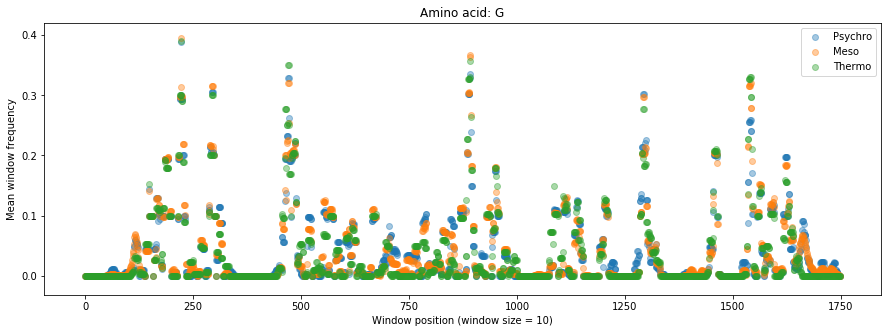

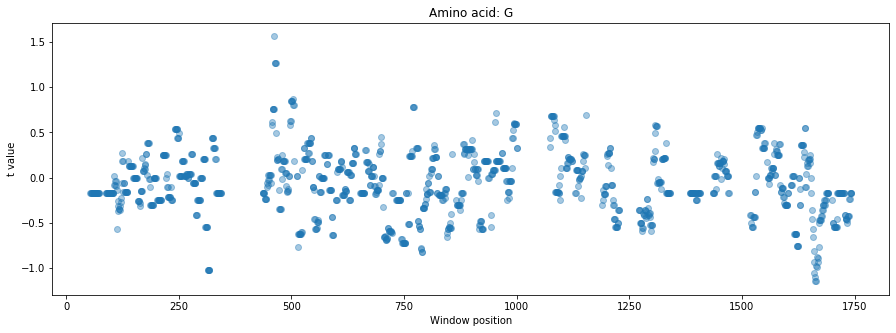

In [11]:
# Plot mean window frequency for each taxa

# titles = ["Psychro", "Meso", "Thermo"]
plt.rcParams['figure.figsize'] = [15, 5]

for taxa_index in range(num_of_files):
#     Comment out plt.figure() to overlay plots! This messes up the titles...
#     plt.figure()    
    
    plt.scatter(range(len(window_freq_means[taxa_index])), window_freq_means[taxa_index], alpha = 0.4)

plt.title(f"Amino acid: {amino}" )
# plt.ylim([0, 0.7])
plt.xlabel(f"Window position (window size = {window_size})")
plt.ylabel('Mean window frequency')
plt.legend(["Psychro", "Meso", "Thermo", f"Window Size: {window_size}"])

# Plot mean window frequency for each taxa

# titles = ["Psychro", "Meso", "Thermo"]
plt.rcParams['figure.figsize'] = [15, 5]

# for taxa_index in range(num_of_files):
#     Comment out plt.figure() to overlay plots! This messes up the titles...
plt.figure()    
    
plt.scatter(range(len(window_freq_means[taxa_index])), t_test_values, alpha = 0.4)

plt.title(f"Amino acid: {amino}")
# plt.ylim([0, 0.7])
plt.xlabel('Window position')
plt.ylabel('t value')

In [54]:
# Find where your chosen amino acid clusters are located based on mean frequency!

# Ajust the mean frequency cutoff value
frequency_cutoff = 0.35
print(f"Mean window amino acid frequencies above {cutoff} are at positions:\n")
for i, mean in enumerate(window_freq_means[0]):
    if mean > frequency_cutoff:
        print(i)

Mean window amino acid frequencies above 0.2 are at positions:

223


In [55]:
# Find where your chosen amino acid clusters are located based on t values!

# Ajust the t value cutoff
t_test_cutoff = 1.1
print(f"t-test values above {t_test_cutoff} are at positions:\n")
for i, t_value in enumerate(t_test_values):
    if t_value > t_test_cutoff:
        print(i)

t_test_below = -1 * t_test_cutoff
print(f"t-test values below {t_test_below} are at positions:\n")
for i, t_value in enumerate(t_test_values):
    if t_value < t_test_below:
        print(i)

t-test values above 1.1 are at positions:

462
463
464
465
t-test values below -1.1 are at positions:

1663
1664


# 